In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

Using TensorFlow backend.


In [3]:
import yfinance as yf

top_tech = yf.Tickers("AMZN AAPL FB GOOGL MSFT")

In [4]:
top_tech.history(period='1y')

[*********************100%***********************]  5 of 5 completed


Close                                                    \
                  AAPL         AMZN          FB        GOOGL        MSFT   
Date                                                                       
2019-11-07   64.302185  1788.199951  190.419998  1306.939941  142.636139   
2019-11-08   64.478165  1785.880005  190.839996  1309.000000  144.317017   
2019-11-11   64.988770  1771.650024  189.610001  1298.280029  144.465332   
2019-11-12   64.929268  1778.000000  194.470001  1297.209961  145.414520   
2019-11-13   65.551399  1753.109985  193.190002  1296.180054  145.651825   
...                ...          ...         ...          ...         ...   
2020-11-02  108.582664  3004.479980  261.359985  1624.319946  202.330002   
2020-11-03  110.249794  3048.409912  265.299988  1645.660034  206.429993   
2020-11-04  114.752022  3241.159912  287.380005  1745.849976  216.389999   
2020-11-05  118.824997  3322.000000  294.679993  1762.500000  223.289993   
2020-11-06  118.690002  3311.370117  293.410004  1759.729980  223.720001   

           Dividends                     ... Stock Splits                     \
                AAPL AMZN FB GOOGL MSFT  ...         AAPL AMZN FB GOOGL MSFT   
Date                                     ...                                   
2019-11-07    0.1925    0  0     0  0.0  ...          0.0    0  0     0    0   
2019-11-08    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2019-11-11    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2019-11-12    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2019-11-13    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
...              ...  ... ..   ...  ...  ...          ...  ... ..   ...  ...   
2020-11-02    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2020-11-03    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2020-11-04    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2020-11-05    0.0000    0  0     0  0.0  ...          0.0    0  0     0    0   
2020-11-06    0.2050    0  0     0  0.0  ...          0.0    0  0     0    0   

               Volume                                        
                 AAPL     AMZN        FB    GOOGL      MSFT  
Date                                                         
2019-11-07   94940400  2651100  13473000  2257000  17786700  
2019-11-08   69986400  2123300  10760800  1519600  16732700  
2019-11-11   81821200  1946000   8631200   861700  14362600  
2019-11-12   87388800  2037600  17615500  1442600  18641600  
2019-11-13  102734400  2989500  10860700  1026900  16919200  
...               ...      ...       ...      ...       ...  
2020-11-02  122866900  7257400  27165700  2211400  30842200  
2020-11-03  107624400  4897900  17961900  1571600  27512000  
2020-11-04  138235500  6839000  35364400  3567100  42311800  
2020-11-05  126387100  5789300  23823600  1987900  36080100  
2020-11-06  114283600  4641300  13880800  1430600  25210600  

[253 rows x 35 columns]

In [5]:
df = top_tech.history(period='1y')['Open'].values
df = df.reshape(-1,1)

[*********************100%***********************]  5 of 5 completed


In [6]:
df.shape

(1265, 1)

In [9]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-5:])
print(dataset_train.shape)
print(dataset_test.shape)

(1012, 1)
(258, 1)


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.00219993],
       [0.51485302],
       [0.03985521],
       [0.36471382],
       [0.02521227],
       [0.00219628],
       [0.51017628]])

In [11]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.06699331],
       [0.45666333],
       [0.04750834],
       [0.02070428],
       [1.        ],
       [0.07175552],
       [0.46854231]])

In [12]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [13]:
a = create_my_dataset(dataset_train)
print(a[0].size)
print(a[1].size)

48100
962


In [14]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.00219993, 0.51485302, 0.03985521, 0.36471382, 0.02521227,
        0.00219628, 0.51017628, 0.03929235, 0.36684738, 0.02525306,
        0.00216779, 0.50726178, 0.03927172, 0.36757821, 0.02564933,
        0.00240518, 0.50627752, 0.03929235, 0.36597802, 0.02592322,
        0.0023745 , 0.50590325, 0.0406774 , 0.36438967, 0.02605726,
        0.00256587, 0.49943185, 0.04015579, 0.36492599, 0.02613884,
        0.00256076, 0.50197209, 0.04054773, 0.37083456, 0.02669537,
        0.0027156 , 0.49556255, 0.04063614, 0.37592974, 0.02702754,
        0.00286899, 0.50107031, 0.04147306, 0.37424707, 0.02726354,
        0.00269662, 0.498757  , 0.0418208 , 0.36974713, 0.02724649]])

In [15]:
y_train[:1]

array([0.00256149])

In [16]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.06699331, 0.45666333, 0.04750834, 0.02070428, 1.        ,
        0.07175552, 0.46854231, 0.04898474, 0.02037185, 0.99202859,
        0.07023491, 0.4634913 , 0.05054365, 0.02083298, 0.98789997,
        0.06992549, 0.46764644, 0.05019592, 0.02235685, 1.01164915,
        0.07014945, 0.46428404, 0.04975683, 0.02377776, 1.02857029,
        0.07137832, 0.47484871, 0.05048177, 0.02063588, 1.01029944,
        0.07052666, 0.48413443, 0.05086487, 0.01862366, 0.96108603,
        0.06795106, 0.45745898, 0.0466891 , 0.01682326, 0.90980978,
        0.06324484, 0.43270493, 0.04415475, 0.01779701, 0.92719361,
        0.064568  , 0.43974806, 0.04447892, 0.01870898, 0.95790925]])

In [17]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)


(962, 50, 1)
(208, 50, 1)


In [18]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [20]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
if(not os.path.exists('mlt_stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('mlt_stock_prediction.h5')

Epoch 1/50
962/962 [==============================] - 21s 21ms/step - loss: 0.0763
Epoch 2/50
962/962 [==============================] - 12s 13ms/step - loss: 0.0729
Epoch 3/50
962/962 [==============================] - 12s 13ms/step - loss: 0.0740
Epoch 4/50
962/962 [==============================] - 12s 13ms/step - loss: 0.0733
Epoch 5/50
962/962 [==============================] - 12s 13ms/step - loss: 0.0741
Epoch 6/50
962/962 [==============================] - 13s 13ms/step - loss: 0.0721
Epoch 7/50
962/962 [==============================] - 13s 13ms/step - loss: 0.0727
Epoch 8/50
962/962 [==============================] - 13s 13ms/step - loss: 0.0725
Epoch 9/50
962/962 [==============================] - 13s 14ms/step - loss: 0.0723
Epoch 10/50
962/962 [==============================] - 13s 14ms/step - loss: 0.0699
Epoch 11/50
962/962 [==============================] - 13s 14ms/step - loss: 0.0650
Epoch 12/50
962/962 [==============================] - 14s 14ms/step - loss: 0.0517
E

range(1012, 1220)


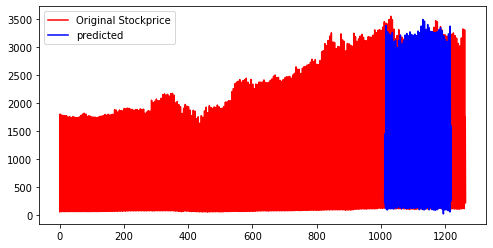

In [22]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='Original Stockprice')
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('full_image_mlt_tck.png')
print(range(len(y_train)+50,len(y_train)+50+len(predictions)))

In [71]:
msft.history('1mo')['Open'].values.reshape(-1,1)

array([[207.06],
       [210.51],
       [211.23],
       [218.79],
       [222.72],
       [223.  ],
       [217.1 ],
       [220.15],
       [220.42],
       [215.8 ],
       [213.12],
       [213.93],
       [215.03],
       [213.85],
       [211.59],
       [207.67],
       [204.07],
       [203.5 ],
       [204.29],
       [203.89],
       [214.02],
       [222.04],
       [222.26]])

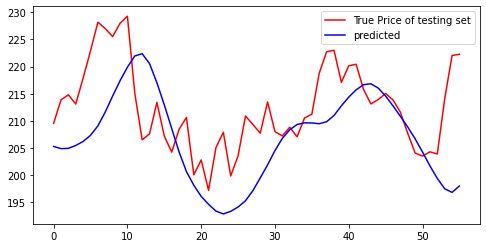

In [72]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Price of testing set')
plt.plot(predictions,color='blue',label='predicted')
plt.legend()
plt.savefig('predict_image_mlt_tck.png')